┌ Info: Precompiling OptimalControl [5f98b655-cc9a-415a-b60e-744165666948]
└ @ Base loading.jl:1664



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Total number of variables............................:      403
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      305
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 1

      

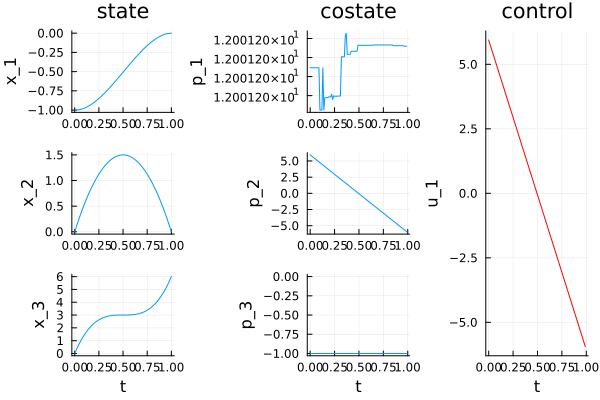

GKS: Possible loss of precision in routine SET_WINDOW


In [1]:
using OptimalControl

t0 = 0.0
tf = 1.0

ocp = Model()

state!(ocp, 2)   # dimension of the state
control!(ocp, 1) # dimension of the control

time!(ocp, [t0, tf])

constraint!(ocp, :initial, [ -1., 0. ])
constraint!(ocp, :final,   [  0., 0. ])

A = [ 0. 1.
      0. 0.]
B = [ 0.
      1. ]

constraint!(ocp, :dynamics, (x, u) -> A*x + B*u)

objective!(ocp, :lagrangian, (x, u) -> 0.5*u^2)

sol = solve(ocp)
plot(sol)